<a href="https://colab.research.google.com/github/ankitsp-762/Bulldozer_price_predictor/blob/main/Bulldozer_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Sale Price Of Bulldozers   
### Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

**•** Train.csv is the training set, which contains data through the end of 2011.  
**•** Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.  
**•** Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
### Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Importing training and validation data
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
              low_memory=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Text(0, 0.5, 'SalePrice')

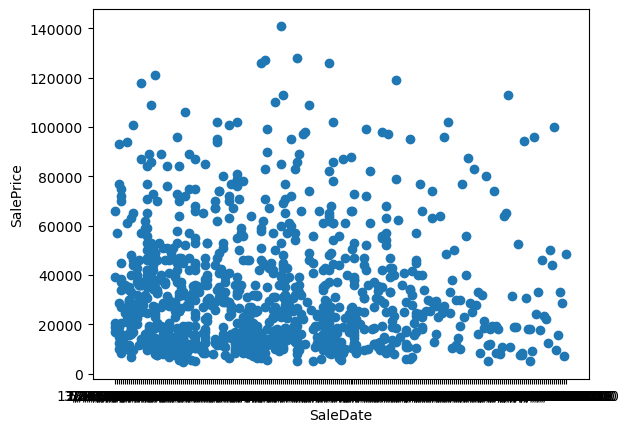

In [ ]:
fig, ax =plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);
plt.xlabel("SaleDate")
plt.ylabel("SalePrice")

<AxesSubplot:ylabel='Frequency'>

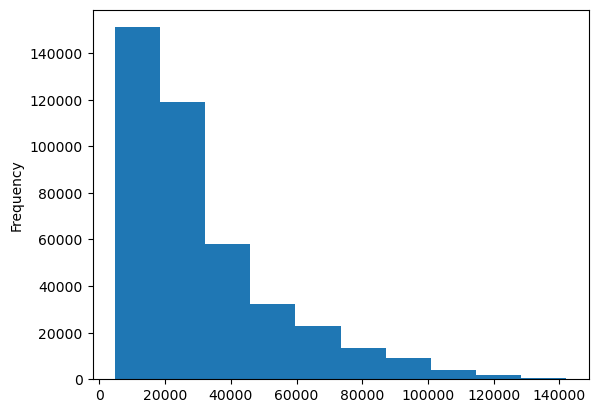

In [ ]:
df.SalePrice.plot.hist()

### Parsing Dates

In [ ]:
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])

In [ ]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Text(0, 0.5, 'SalePrice')

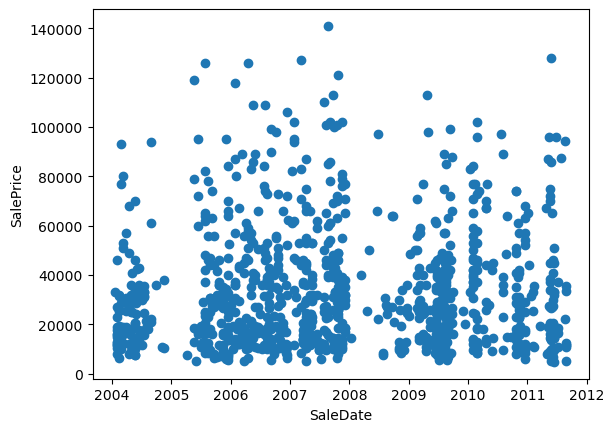

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);
plt.xlabel("SaleDate")
plt.ylabel("SalePrice")

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

In [ ]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
df_temp=df.copy()

In [ ]:
df_temp.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

## Add datetime parameter for `saledate` column

In [ ]:
df_temp["saleYear"]=df_temp["saledate"].dt.year
df_temp["saleMonth"]=df_temp["saledate"].dt.month
df_temp["saleDay"]=df_temp["saledate"].dt.day
df_temp["saleDayOfWeek"]=df_temp["saledate"].dt.dayofweek
df_temp["saleDayOfYear"]=df_temp["saledate"].dt.dayofyear

In [ ]:
df_temp.drop("saledate",axis=1,inplace=True)
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## Convert String to Categories

In [ ]:
for label,value in df_temp.items():
    if(pd.api.types.is_string_dtype(value)):
        df_temp[label]=value.astype("category").cat.as_ordered()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

## Save Preprocessed Data

In [ ]:
df_temp.to_csv("data/bluebook-for-bulldozers/tran.tmp.csv",
              index=False)

## Fill Missing Values
### Fill  numerical missing values

In [ ]:
for label,value in df_temp.items():
    if(pd.api.types.is_numeric_dtype(value)):
        if pd.isnull(value).sum():
            df_temp[label+"_is_missing"]=pd.isnull(value)
            df_temp[label]=value.fillna(value.median())
        

In [ ]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

## Fill and turn Categorical value into numerical

In [ ]:
for label,value in df_temp.items():
    if not pd.api.types.is_numeric_dtype(value):
        df_temp[label+"_is_missing"]=pd.isnull(value)
        ## turn categories into number and add +1 --> for null its categorical code will be -1
        df_temp[label]=pd.Categorical(value).codes +1

In [ ]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Splitting Data into Train/Validation sets

In [ ]:
df_val=df_temp[df_temp.saleYear == 2012]
df_train=df_temp[df_temp.saleYear != 2012]

len(df_val),len(df_train)


(11573, 401125)

In [ ]:
# Split data into X & y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
X_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

X_train.shape,y_train.shape,X_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an Evaluation function

In [ ]:
from sklearn.metrics import r2_score, mean_squared_log_error,mean_absolute_error

# function to evaluate model for root_mean_squared_log_error
def RMSLE(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))    

# function to evaluate model
def show_score(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_val)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_val,val_preds),
           "Taining RMLSE":RMSLE(y_train,train_preds),
           "Valid RMSLE":RMSLE(y_val,val_preds),
           "Taining R^2":r2_score(y_train,train_preds),
           "Valid R^2":r2_score(y_val,val_preds)}
    return scores


## Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                          random_state=42,
                           max_samples=10000)
model.fit(X_train,y_train)


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
show_score(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Taining RMLSE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Taining R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tunning with randomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rg_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}


rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                               random_state=42),
                               param_distributions=rg_grid,
                               n_iter=2,
                               cv=5,
                               verbose=True)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.score(X_val,y_val)

0.7762614418803269

In [ ]:
show_score(rs_model)

{'Training MAE': 7189.480314320231,
 'Valid MAE': 8392.363571370568,
 'Taining RMLSE': 0.31821159899567003,
 'Valid RMSLE': 0.337176207417892,
 'Taining R^2': 0.7792115991125736,
 'Valid R^2': 0.7762614418803268}

### Train Model with best hyperparameters

In [ ]:
%%time

f_model=RandomForestRegressor(n_jobs=-1,
                               random_state=42,
                             n_estimators=42,
                             min_samples_leaf=1,
                             min_samples_split=4,
                             max_features=0.5,
                             max_samples=None)
f_model.fit(X_train,y_train)

CPU times: total: 7min 17s
Wall time: 2min 18s


RandomForestRegressor(max_features=0.5, min_samples_split=4, n_estimators=42,
                      n_jobs=-1, random_state=42)

In [ ]:
f_model.score(X_val,y_val)

0.8804739580151623

In [ ]:
show_score(f_model)

{'Training MAE': 1838.3559604734528,
 'Valid MAE': 5984.230962748217,
 'Taining RMLSE': 0.09687899879081595,
 'Valid RMSLE': 0.24848381105079584,
 'Taining R^2': 0.9828869606267855,
 'Valid R^2': 0.8804739580151623}

## Making Prediction on test data

In [ ]:
df_test=pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Prepocessing the test data

In [ ]:
def preprocess_data(df_temp):
    
    df_temp["saleYear"]=df_temp["saledate"].dt.year
    df_temp["saleMonth"]=df_temp["saledate"].dt.month
    df_temp["saleDay"]=df_temp["saledate"].dt.day
    df_temp["saleDayOfWeek"]=df_temp["saledate"].dt.dayofweek
    df_temp["saleDayOfYear"]=df_temp["saledate"].dt.dayofyear
    
    df_temp.drop("saledate",axis=1,inplace=True)
    
        #convert string into categorical  
    for label,value in df_temp.items():
        if(pd.api.types.is_string_dtype(value)):
            df_temp[label]=value.astype("category").cat.as_ordered()
    
    # fill the numerical missing data with median
    for label,value in df_temp.items():
        if(pd.api.types.is_numeric_dtype(value)):
            if pd.isnull(value).sum():
                df_temp[label+"_is_missing"]=pd.isnull(value)
                df_temp[label]=value.fillna(value.median())
            
    # convert categorialinto numerical and fill missing data 
    for label,value in df_temp.items():
        if not pd.api.types.is_numeric_dtype(value):
            df_temp[label+"_is_missing"]=pd.isnull(value)
            ## turn categories into number and add +1 --> for null its categorical code will be -1
            df_temp[label]=pd.Categorical(value).codes +1
    
    return df_temp
    
    
    

In [ ]:

df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
# finding where train set and test set differ
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
#mannually adjust df_test
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [ ]:
# Making prediction on test data

test_preds=f_model.predict(df_test)

C:\Users\Admin\Desktop\projects\bulldozer_price_predictor\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
test_preds

array([22949.70238095, 20415.69822373, 55279.25170068, ...,
       18859.41043084, 21228.85487528, 31031.54761905])

In [ ]:
# Formating prediction

df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,22949.702381
1,1227844,20415.698224
2,1227847,55279.251701
3,1227848,66337.301587
4,1227863,41633.293651
...,...,...
12452,6643171,43314.814815
12453,6643173,15521.598639
12454,6643184,18859.410431
12455,6643186,21228.854875


In [ ]:
# Export prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_prediction.csv",index=False)

## Feature Importance

In [ ]:
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
       .reset_index(drop=True))
    
    #plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    

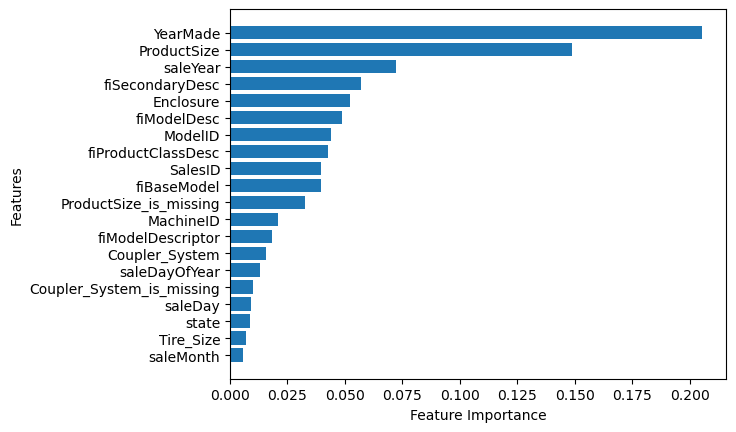

In [ ]:
plot_features(X_train.columns,f_model.feature_importances_)